![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [34]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("./data/data_embedding_numeric.csv")


In [35]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
import numpy as np
import pandas as pd

df_270 = df_270.iloc[np.random.permutation(len(df_270))]
df_270.head(2)

,Unnamed: 0,seller_nickname,stock,price,regular_price,Products,total_amount,regular_total_amount,Kmeans,AgC,mix,tokens,embedding
46,46,ebbb5d901c,5,3192.00,3800.00,1,15960.00,1.212960e+07,0,0,Stock: 5; Price: 3192.0; Regular_price: 3800.0...,45,"[0.024363234639167786, -0.024069219827651978, ..."
523,523,2b42a1dadd,241,187.06,336.71,2,45081.46,6.298497e+04,0,0,Stock: 241; Price: 187.06; Regular_price: 336....,49,"[0.0009372422355227172, -0.04406501352787018, ..."


In [36]:
# Separo la data de validacion que son los registros que tienen null,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)

(0, 13)


In [37]:
#retiro los nulls del dataframe fuente
df_270=df_270[df_270['Kmeans'].isnull()==False]
print(df_270[df_270['Kmeans'].isnull()]) # Valido que ninguno no tengan datos con valores en la etiqueta
df_270['Kmeans'] =df_270['Kmeans'].astype(str)
df_270['AgC'] =df_270['AgC'].astype(str)
df_270.head(10)

Empty DataFrame
Columns: [Unnamed: 0, seller_nickname, stock, price, regular_price, Products, total_amount, regular_total_amount, Kmeans, AgC, mix, tokens, embedding]
Index: []


,Unnamed: 0,seller_nickname,stock,price,regular_price,Products,total_amount,regular_total_amount,Kmeans,AgC,mix,tokens,embedding
46,46,ebbb5d901c,5,3192.00,3800.00,1,15960.00,1.212960e+07,0,0,Stock: 5; Price: 3192.0; Regular_price: 3800.0...,45,"[0.024363234639167786, -0.024069219827651978, ..."
523,523,2b42a1dadd,241,187.06,336.71,2,45081.46,6.298497e+04,0,0,Stock: 241; Price: 187.06; Regular_price: 336....,49,"[0.0009372422355227172, -0.04406501352787018, ..."
298,298,968e2f5f70,9,693.00,990.00,1,6237.00,6.860700e+05,0,0,Stock: 9; Price: 693.0; Regular_price: 990.0; ...,42,"[0.021042803302407265, -0.02342013642191887, 0..."
582,582,f5c64d6bb7,6,11814.02,13596.00,4,70884.12,1.606234e+08,1,3,Stock: 6; Price: 11814.02; Regular_price: 1359...,47,"[0.015176234766840935, -0.03914421796798706, 0..."
605,605,9431c5a107,9,10974.04,14796.00,5,98766.36,1.623719e+08,1,3,Stock: 9; Price: 10974.04; Regular_price: 1479...,47,"[0.013576646335422993, -0.023300638422369957, ..."
711,711,5fc29552fa,43,2049.25,2193.30,9,88117.75,4.494620e+06,3,0,Stock: 43; Price: 2049.25; Regular_price: 2193...,45,"[0.019146844744682312, -0.0548921674489975, 0...."
188,188,afb736ae78,1,1752.75,1845.00,1,1752.75,3.233824e+06,0,0,Stock: 1; Price: 1752.75; Regular_price: 1845....,45,"[0.015592481940984726, -0.03960037603974342, 0..."
318,318,9bf71502f3,26998,266.56,280.59,1,7196586.88,7.479407e+04,2,2,Stock: 26998; Price: 266.56; Regular_price: 28...,45,"[0.026369262486696243, -0.038173407316207886, ..."
356,356,f4bbb9bcdd,26,1197.82,1982.00,2,31143.32,2.374079e+06,0,0,Stock: 26; Price: 1197.8200000000002; Regular_...,52,"[0.015638211742043495, -0.04273168370127678, -..."
81,81,1d0970a474,283,9868.15,11110.84,10,2792686.45,1.096434e+08,1,3,Stock: 283; Price: 9868.15; Regular_price: 111...,46,"[0.03869644179940224, -0.030576620250940323, 0..."


In [38]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=30,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
0    200
1    200
3    200
2    200
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

## RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.67      0.67      0.67         6
           2       0.75      0.86      0.80         7
           3       0.60      0.60      0.60         5

    accuracy                           0.80        30
   macro avg       0.75      0.76      0.76        30
weighted avg       0.81      0.80      0.80        30



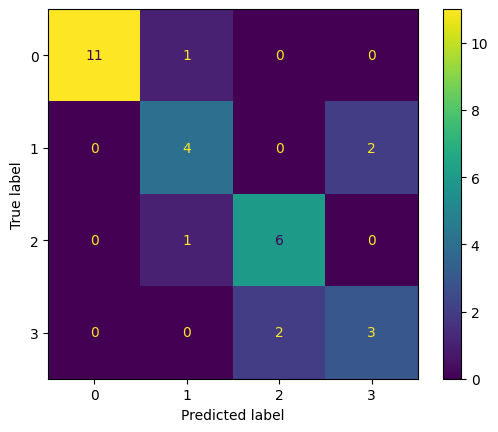

In [39]:
# Modelado, Entrenamiento, Evaluacion
clf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.71      0.83      0.77         6
           2       1.00      0.86      0.92         7
           3       0.83      1.00      0.91         5

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.92      0.90      0.90        30



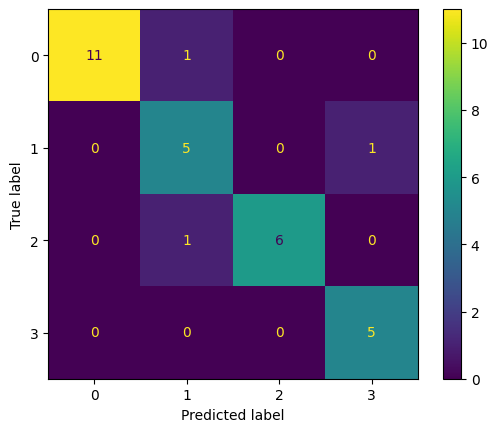

In [40]:
# Modelado, Entrenamiento, Evaluacion
clf = SVC() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

In [ ]:
# Modelado, Entrenamiento, Evaluacion
clf = XGBClassifier() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion